Assignment Expectations/Steps -

Import and store the data in a data frame. (2.5 points)
Remove the outliers from the data (5 points)
Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)
Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
Print the coefficients & intercepts of the linear regression model (5 points)
Print the accuracy of the overall model (2.5 points)

In [67]:
import warnings 
warnings.filterwarnings('ignore')

In [68]:
import pandas as pd
import numpy as np

In [69]:
#Import and store the data in a data frame. (2.5 points)
# downloaded the data into a text file on local machine
aq_df = pd.read_csv("Aq_data.txt", sep="\s+",header=None)

In [70]:
aq_df.info() # there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
0     1000 non-null object
1     1000 non-null object
2     1000 non-null float64
3     1000 non-null int64
4     1000 non-null float64
5     1000 non-null object
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null object
9     1000 non-null float64
10    1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [71]:
aq_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [72]:
aq_df = aq_df.rename(columns = {0:'City1', 1:'City2', 2:'Avg_Fare1', 3:'Distance', 4: 'Avg_wkly_pssngrs', 5:'market_leading_airline', 6: 'market_share1', 7: 'Avg_fare2', 8:'Low_price_airline',9:'market_share2', 10:'price'})
aq_df.head()

,City1,City2,Avg_Fare1,Distance,Avg_wkly_pssngrs,market_leading_airline,market_share1,Avg_fare2,Low_price_airline,market_share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [73]:
#Remove the outliers from the data (5 points) 

In [74]:
aq_df.describe().transpose() # Observation:af1,dist,ms1,af2,ms2 and price do have variations between mean & 50% .

,count,mean,std,min,25%,50%,75%,max
Avg_Fare1,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Avg_wkly_pssngrs,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market_share1,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Avg_fare2,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market_share2,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [75]:
# now we can use seabon to visually the outliers for all numeric columns except the Y column.
import seaborn as sns

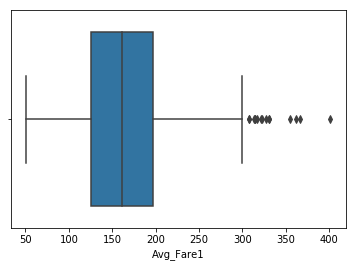

In [76]:
sns.boxplot(x=aq_df['Avg_Fare1']) #outliers are observed

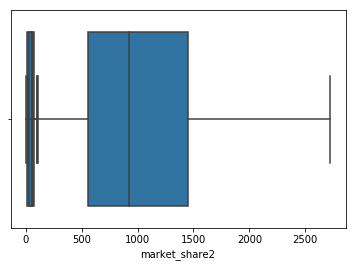

In [77]:
sns.boxplot(x=aq_df['Distance']) # observations on boxplot of distance, market share 1 &2 reveals that there are no outliers
sns.boxplot(x=aq_df['market_share1'])
sns.boxplot(x=aq_df['market_share2'])


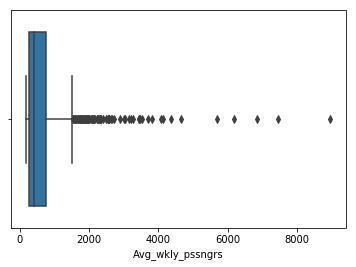

In [78]:
sns.boxplot(x=aq_df['Avg_wkly_pssngrs']) #outliers are observed

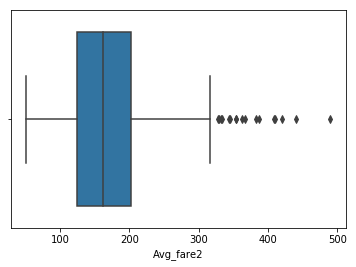

In [79]:
sns.boxplot(x=aq_df['Avg_fare2'])

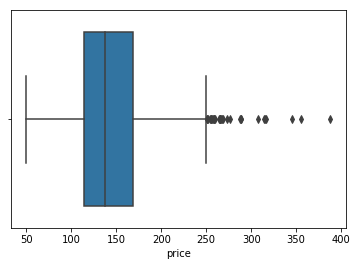

In [80]:
sns.boxplot(x=aq_df['price']) #outliers are observed

In [81]:
# there are 4 numeric columns for which we need to remove outliers - avg fare 1, Avg_weekly-Passgrs, avg fare2 and price.

In [82]:
len(aq_df) # original length

1000

In [83]:
aq_df['Outlier'] = False # add a temp column to mark outliers for deletion. will be deleted later

In [84]:
# define a function which marks the outliers for any column as "True" in aq_df , 
# and returns the count of outliers rows for the column

In [85]:
def mark_outlier_row_from_Column(column_name):
    count = 0
    q1 = aq_df[column_name].quantile(0.25)
    q3 = aq_df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    for i in range(0,len(aq_df)):
        if aq_df[column_name][i] < lower_bound:            
            aq_df['Outlier'][i] = True
            count = count +1
        if aq_df[column_name][i] > upper_bound:            
            count = count +1
            aq_df['Outlier'][i] = True
    return(column_name, count)


In [86]:
# will pick up the 4 columns with outliers one by one and identify the rows with outliers in "Outlier" column
# processing for "price"

In [87]:
print(mark_outlier_row_from_Column('price'))

('price', 30)


In [88]:
# similarly for other columns

In [89]:
print(mark_outlier_row_from_Column('Avg_wkly_pssngrs'))

('Avg_wkly_pssngrs', 79)


In [90]:
print(mark_outlier_row_from_Column('Avg_fare2'))

('Avg_fare2', 17)


In [91]:
print(mark_outlier_row_from_Column('Avg_Fare1'))

('Avg_Fare1', 15)


In [92]:
outlier_df = aq_df[aq_df['Outlier'] == True] 
len(outlier_df) # 115 outliers in all have to be removed

115

In [93]:
aq_df.drop(aq_df[aq_df['Outlier'] == True].index, inplace = True) 

In [94]:
# finally remove the outlier column that was added to treat outliers
del aq_df['Outlier']


In [95]:
print(aq_df.shape)

(885, 11)


In [96]:
aq_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Fare1,885.0,160.292068,48.468895,50.52,126.60,160.71,194.05,288.58
Distance,885.0,1039.383051,615.224361,108.00,564.00,914.00,1381.00,2724.00
Avg_wkly_pssngrs,885.0,499.132644,327.573566,181.41,249.02,372.93,644.56,1519.89
market_share1,885.0,60.636938,19.361447,17.68,47.02,59.75,74.66,100.00
Avg_fare2,885.0,162.589051,53.288002,50.52,125.59,160.74,198.47,315.86
market_share2,885.0,34.373028,27.183305,1.06,13.06,26.25,52.93,100.00
price,885.0,140.431073,39.849789,50.52,115.11,138.02,166.26,250.02


In [97]:
# let's convert all the non  categorical fiels to codes for linear modelling
aq_df['City1'] = pd.Categorical(aq_df['City1']).codes
aq_df['City2'] = pd.Categorical(aq_df['City2']).codes
aq_df['market_leading_airline'] = pd.Categorical(aq_df['market_leading_airline']).codes
aq_df['Low_price_airline'] = pd.Categorical(aq_df['Low_price_airline']).codes
aq_df.head()

,City1,City2,Avg_Fare1,Distance,Avg_wkly_pssngrs,market_leading_airline,market_share1,Avg_fare2,Low_price_airline,market_share2,price
0,16,0,114.47,528,424.56,6,70.19,111.03,7,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,5,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,4,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,16,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,16,15.34,145.42


In [98]:
# Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points) 

In [99]:
aq_df.corr()['Avg_Fare1'][:] # all negative correlations will be dropped. Positive ones are above 0.1

City1                    -0.092398
City2                    -0.029294
Avg_Fare1                 1.000000
Distance                  0.522650
Avg_wkly_pssngrs         -0.197005
market_leading_airline   -0.321035
market_share1            -0.207955
Avg_fare2                 0.979713
Low_price_airline        -0.173631
market_share2            -0.493555
price                     0.840993
Name: Avg_Fare1, dtype: float64

In [100]:
del aq_df['City1']
del aq_df['City2'] 


In [101]:
del aq_df['Avg_wkly_pssngrs']
del aq_df['market_leading_airline']
del aq_df['market_share1']
del aq_df['Low_price_airline']
del aq_df['market_share2']

In [102]:
#  Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

In [103]:
aq_df.head()

,Avg_Fare1,Distance,Avg_fare2,price
0,114.47,528,111.03,111.03
1,122.47,860,123.09,118.94
2,214.42,852,223.98,167.12
3,69.40,288,68.86,68.86
4,158.13,723,161.36,145.42


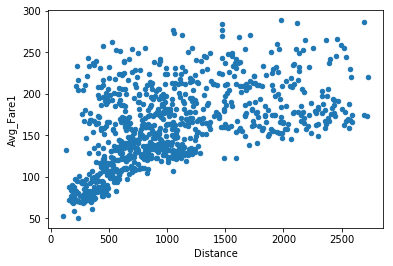

In [104]:
#sns.pairplot(aq_df, hue = "Avg_Fare1")
aq_df.plot.scatter("Distance","Avg_Fare1") # observation as distance increases the avg fare goes up, 
#though there is alot of scatter  after 500 dis, which means that there are influencing factors beyond distance

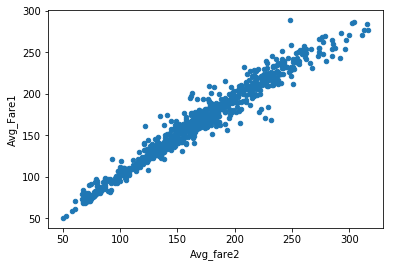

In [105]:
aq_df.plot.scatter("Avg_fare2","Avg_Fare1")# observation - a ery clean direct propotionality is observed

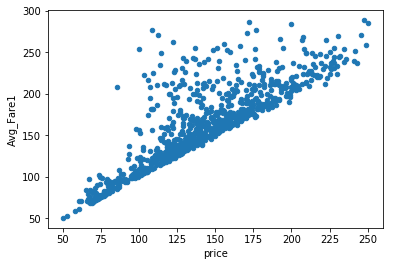

In [106]:
aq_df.plot.scatter("price","Avg_Fare1") # price is directly propostional to increasing fare with slight scater dues for middle order prices

In [107]:
#Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
# Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [108]:
#Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
from sklearn.model_selection import train_test_split
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = aq_df.drop('Avg_Fare1', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = aq_df[['Avg_Fare1']]

#Y_df = aq_df['Avg_Fare1']
#X_df =  aq_df[:]
#del X_df['Avg_Fare1']
#X = X_df.values 
#Y = Y_df.values   
# taking 80:20 training and test set
# Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [109]:
# build a Multiple Linear Regression model. (5 points)
from sklearn.linear_model import LinearRegression

# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
type(X_train)

pandas.core.frame.DataFrame

In [127]:
# Print the coefficients & intercepts of the linear regression model (5 points) 

# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))
    

The coefficient for Distance is 0.0017030273458205777
The coefficient for Avg_fare2 is 0.749701968614342
The coefficient for price is 0.21801893962832292


In [130]:
# Exploring the intercept for the model
print(" The intercept for the model is {}".format(regression_model.intercept_))

 The intercept for the model is 5.741402943974379


In [ ]:
# we can write our linear model as:
# Y= 5.74 + 0.0017 × dist + 0.75 × avd_fare + 0.218 x price

In [126]:
# Print the accuracy of the overall model (2.5 points)

In [131]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.969541977906702

In [ ]:
# accuarcy is pretty high !!